In [1]:
# Render plots inline
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./Datasets/Dataset_1_train.csv', header=None, names=['x', 'y'], index_col=False)

In [4]:
x_values = df['x']
y_values = df['y']

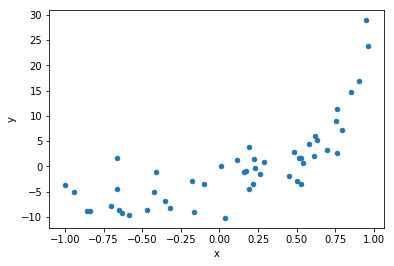

In [5]:
df.plot(x='x', y='y', kind='scatter')

In [6]:
def make_data_array(x_values, degree):
    X_data = []
    for x_val in x_values:
        col = []
        for power in range(degree+1):
            col.append(x_val ** power)
        X_data.append(col)
    X_matrix = np.array(X_data)
    return X_matrix

In [7]:
X_matrix = make_data_array(x_values, 20)

In [8]:
def find_params_vector(data_matrix, y_values):
    data_product = (data_matrix.T).dot(data_matrix)
    inv_product = np.linalg.inv(data_product)
    params_vector = (inv_product.dot(data_matrix.T)).dot(y_values)
    return params_vector

In [9]:
params_vector = find_params_vector(X_matrix, y_values)

In [10]:
def find_mse(data_matrix, params_vector, y_values):
    y_predictions = np.array([row.dot(params_vector) for row in data_matrix])
    error = y_values - y_predictions
    error_square = error.dot(error)
    mse = error_square/len(y_values)
    return mse

In [11]:
mse = find_mse(X_matrix, params_vector, y_values)

In [12]:
print(mse)

6.474766080931443
